In [1]:
from sklearn.datasets import load_boston
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\AAZam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Переменная, которую надо предсказать - ’MEDV’.

#Прочитать информацию о содержимом датасета:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

CRIM	уровень преступности на душу населения по городам	\
ZN	доля жилой земли, зонированной для участков площадью более 25 000 кв.фут.	\
INDUS	доля неторговых бизнес-акров в расчете на один город	\
CHAS	Фиктивная переменная Чарльз-Ривер (= 1, Если тракт ограничивает реку; 0 в противном случае)	\
NOX	концентрация оксидов азота (частей на 10 млн.)	\
RM	среднее количество комнат на одно жилое помещение	\
AGE	доля занятых собственниками объектов, построенных до 1940 года	\
DIS	взвешенные расстояния до пяти бостонских центров занятости	\
RAD	индекс доступности радиальных магистралей	\
TAX	ставка налога на недвижимость с полной стоимостью за $ 10 000	\
PTRATIO	соотношение учащихся и учителей по городам	\
B	1000 (Bk - 0,63)^2, где Bk-доля чернокожих по городам	\
LSTAT	% более низкий статус населения	\
MEDV	Медианная стоимость домов, занятых владельцами, в 1000-х годах	\

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Количество записей невелико - 506. Пропусков в данных нет**

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Все показатели числовые, дальше проверим зависимости между ними**

<AxesSubplot:>

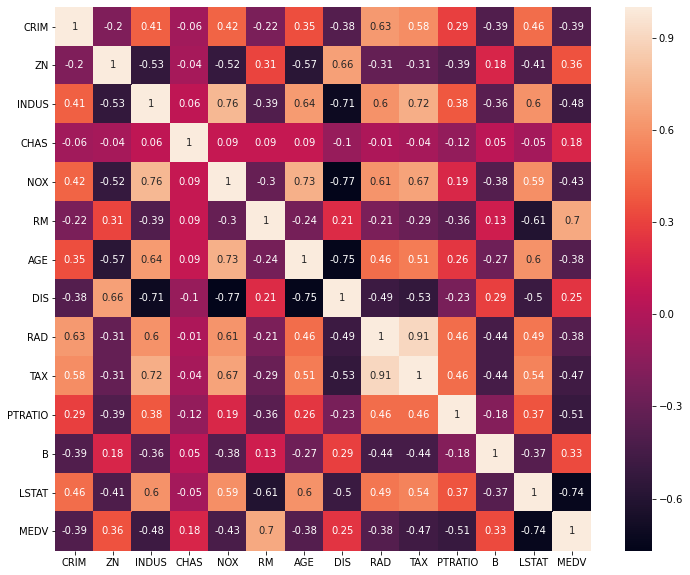

In [6]:
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

**Самая сильная кореляция MEDV идет с показателями RM (среднее количество комнат на одно жилое помещение) и LSTAT (% населения с низким социальным статусом), что ожидаемо. Чем больше комнат, тем дороже жильё и чем более бедное население проживает в районе, тем стоимость жилья ниже**

**Так как по показателю криминогенности есть выбросы, исследуем его подробней**

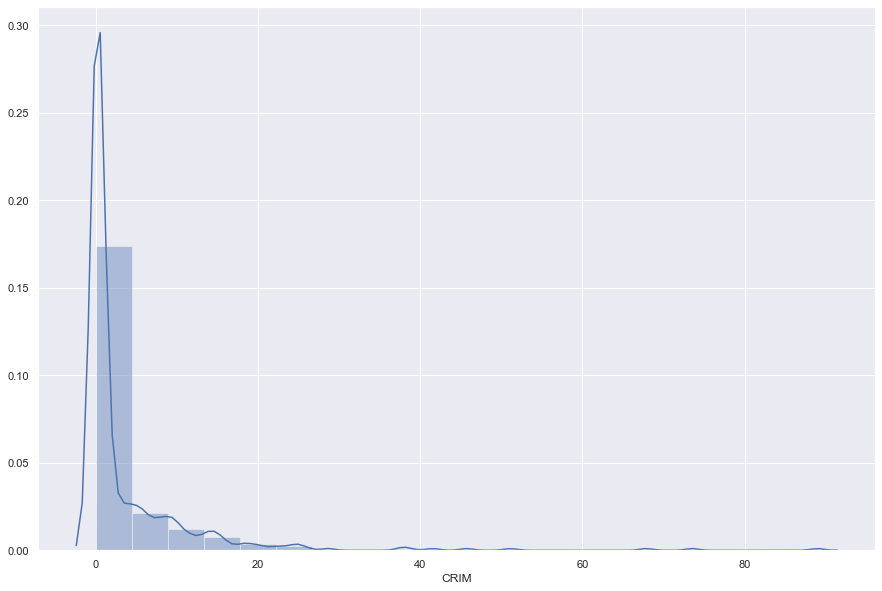

In [7]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.distplot(data['CRIM'], bins=20)
plt.show()

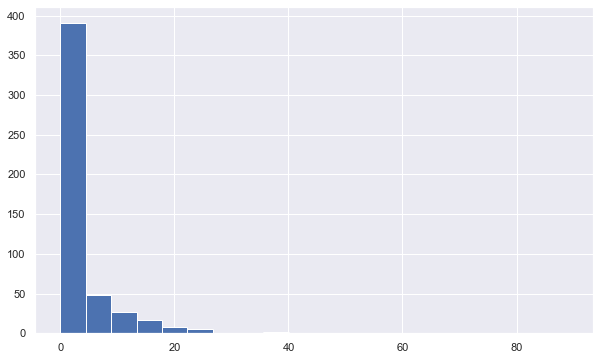

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data['CRIM'], bins=20)
plt.show()

**Видно что после 30 идут выбросы. Исследуем подробнее**

In [9]:
data.query('CRIM > 20')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
378,23.6482,0.0,18.1,0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.69,13.1
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
384,20.0849,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
386,24.3938,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5
387,22.5971,0.0,18.1,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
400,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
403,24.8017,0.0,18.1,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [10]:
data[data['CRIM'] > 30]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


**Уберем аномальные значеняи с показателем криминогенности более 30**

In [11]:
data = data[data['CRIM'] < 30]

**Исследуем показатель налогов на жильё**

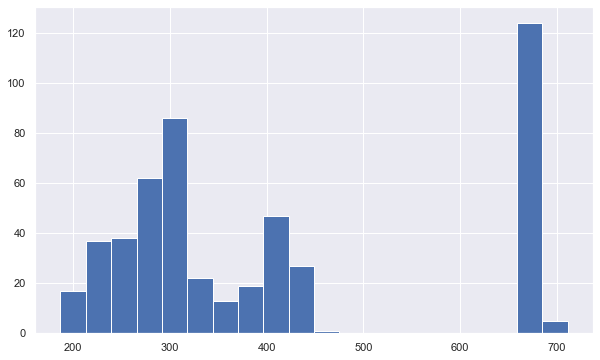

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['TAX'], bins=20)
plt.show()

In [13]:
data[data['TAX'] == 666]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1


In [14]:
data['TAX'].value_counts()

666    124
307     40
403     30
437     15
304     14
      ... 
280      1
313      1
351      1
422      1
285      1
Name: TAX, Length: 66, dtype: int64

In [15]:
data[(data['TAX'] > 470) & (data['TAX'] < 666)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


**Видим провал в налоге от 470 до 666 доллларов. Для себя отметил, но как использовать не понял.**

**Посмотрим на показатель NOX**

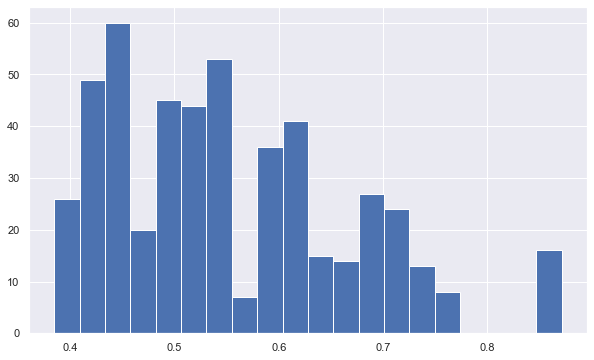

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['NOX'], bins=20)
plt.show()

In [17]:
data[data['NOX'] > 0.8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,396.90,26.42,15.6
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
147,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
148,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
149,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28,19.6


In [18]:
data['NOX'].value_counts()

0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.435     1
0.422     1
0.518     1
0.385     1
0.389     1
Name: NOX, Length: 81, dtype: int64

**Посмотрим на гистограммы остальных признаков**

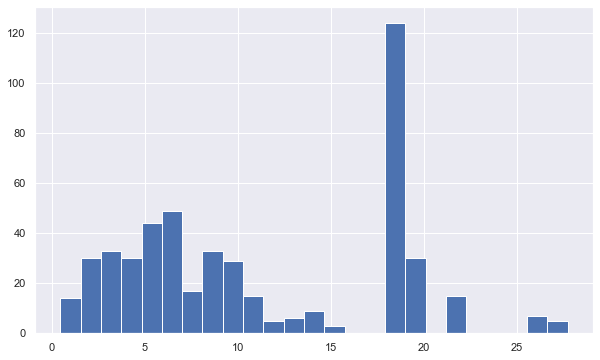

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data['INDUS'], bins=25)
plt.show()

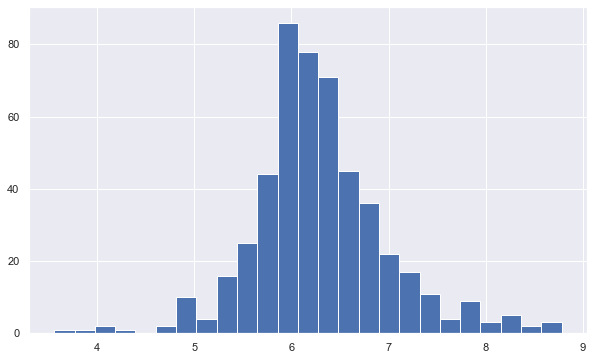

In [20]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], bins=25)
plt.show()

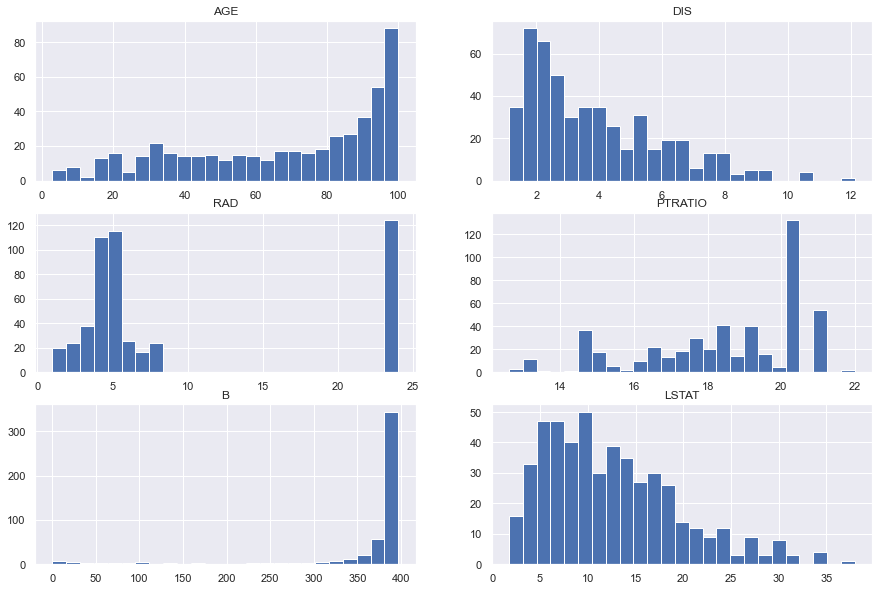

In [21]:
data_viz = data[['AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]

a = 0

fig, ax = plt.subplots(
    nrows=3, ncols=2,
    figsize=(15, 10))

for axi in ax:
    
    for axj in axi:
        axj.hist(data_viz.iloc[:, a], bins=25)
        axj.set_title(data_viz.iloc[:, a].name)
        a += 1
        
plt.show()

**Попробуем построить предсказательную модель основываясь на признаках: CRIM, RM,  AGE, TAX, LSTAT**

In [22]:
x = data[['CRIM', 'RM',  'AGE', 'TAX', 'LSTAT']]
y = data['MEDV']

**Разделим данные на тренировочные и тестовые**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

**Обучаем модель**

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Тестируем модель и проверяем метрики точности**

In [27]:
y_pred = model.predict(x_test)

print("Метрика R2: \t", r2_score(y_test, y_pred))
print("Среднеквадратичная ошибка: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("Средняя абсолютная ошибка: \t", mean_absolute_error(y_test, y_pred))

Метрика R2: 	 0.5994503655894259
Среднеквадратичная ошибка: 	 5.214603675310466
Средняя абсолютная ошибка: 	 3.674093140631975


**Абсолютная ошибка составляет 3,7 при среднем заначении прогнозируемого показателя 22,5. что является неплохим результатом**